In [44]:
import sys
import requests
import inspect
import pandas as pd
import random
import csv


from skmultiflow.trees.hoeffding_tree import HoeffdingTreeClassifier
print (inspect.getfile(HoeffdingTreeClassifier))  
from skmultiflow.trees.hoeffding_adaptive_tree import HoeffdingAdaptiveTreeClassifier
from skmultiflow.data.file_stream import FileStream
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as clr
import matplotlib.colorbar as clb

/opt/anaconda3/envs/skmultiflow_dev/lib/python3.6/site-packages/scikit_multiflow-0.5.dev0-py3.6-macosx-10.9-x86_64.egg/skmultiflow/trees/hoeffding_tree.py


In [45]:
def compute_y_weight(y):
    aux = np.unique(y,return_counts=True)
    nb_classes = len(aux[0])
    list_classes = aux[0]
    count_classes = aux[1]
    sum_classes =  float(np.sum(count_classes))
    weight_classes = count_classes/sum_classes
    y_weights = y.copy()
    
    i = 0
    while i < nb_classes:
        
        class_i = list_classes[i]
        y_weights = np.where(y_weights==float(class_i), weight_classes[i], y_weights) 
        i += 1
    return y_weights

In [46]:
from sklearn.datasets import make_moons
X, y = make_moons(**{'n_samples': 10000, 'noise': 0.2})
print (np.unique(y,return_counts=True) )
y_weights = compute_y_weight(y)

cfiers = [HoeffdingTreeClassifier(split_confidence=1e-6,split_criterion='gini'), 
          HoeffdingAdaptiveTreeClassifier(split_confidence=1e-6,split_criterion='gini')
         ]

print("Arbol 1")
cfiers[0].partial_fit(X,y,[0,1],y_weights )
cfiers[1].partial_fit(X,y,[0,1],y_weights )

(array([0, 1]), array([5000, 5000]))
HoeffdingTreeClassifier class constructor
HoeffdingTreeClassifier class constructor
Arbol 1


HoeffdingAdaptiveTreeClassifier(binary_split=False, bootstrap_sampling=True,
                                grace_period=200, leaf_prediction='nba',
                                max_byte_size=33554432,
                                memory_estimate_period=1000000, nb_threshold=0,
                                no_preprune=False, nominal_attributes=None,
                                remove_poor_atts=False, split_confidence=1e-06,
                                split_criterion='gini',
                                stop_mem_management=False, tie_threshold=0.05)

In [47]:
print (cfiers[0].get_model_description())

if Attribute 1 <= 0.12093160645142165:
  Leaf = Class 1 | {0: 246.45766553909448, 1: 1863.8342359790445}
if Attribute 1 > 0.12093160645142165:
  Leaf = Class 0 | {0: 2253.5423344609053, 1: 636.1657640209556}



In [48]:
cfiers[0].measure_tree_depth()

1

In [49]:
print (cfiers[0].measure_byte_size() )

12755


In [50]:
print (cfiers[1].get_model_description())

if Attribute 1 <= 0.22866933025538483:
  if Attribute 0 <= -0.5254873234717998:
    Leaf = Class 0 | {0: 152.6585711311909}
  if Attribute 0 > -0.5254873234717998:
    Leaf = Class 1 | {0: 342.3414288688091, 1: 2536.5}
if Attribute 1 > 0.22866933025538483:
  if Attribute 0 <= 1.2986193010185283:
    Leaf = Class 0 | {0: 2576.9937938955854, 1: 331.61441814498045}
  if Attribute 0 > 1.2986193010185283:
    Leaf = Class 1 | {0: 55.50620610441456, 1: 234.38558185501958}



In [51]:
cfiers[1].measure_tree_depth()

2

In [52]:
cfiers[1].measure_byte_size()

60481

## Copy

In [53]:
np.max(X,axis=0)

array([2.66430997, 1.62159776])

In [54]:
X_copy = np.random.uniform(np.min(X,axis=0),np.max(X,axis=0),(20000,2))
y_copy = cfiers[1].predict(X_copy)

In [55]:
np.unique(y_copy,return_counts=True)

(array([0, 1]), array([ 9677, 10323]))

In [56]:

y_weights_copy = compute_y_weight(y_copy)

cfiers_copy = [HoeffdingTreeClassifier(split_confidence=1e-10, split_criterion='misclassification'), 
          HoeffdingAdaptiveTreeClassifier(split_confidence=1e-10,split_criterion='misclassification')
         ]

cfiers_copy[0].partial_fit(X_copy,y_copy,[0,1],y_weights_copy )
cfiers_copy[1].partial_fit(X_copy,y_copy,[0,1],y_weights_copy )

HoeffdingTreeClassifier class constructor
HoeffdingTreeClassifier class constructor
Arbol 1


HoeffdingAdaptiveTreeClassifier(binary_split=False, bootstrap_sampling=True,
                                grace_period=200, leaf_prediction='nba',
                                max_byte_size=33554432,
                                memory_estimate_period=1000000, nb_threshold=0,
                                no_preprune=False, nominal_attributes=None,
                                remove_poor_atts=False, split_confidence=1e-10,
                                split_criterion='misclassification',
                                stop_mem_management=False, tie_threshold=0.05)

## Gráfico

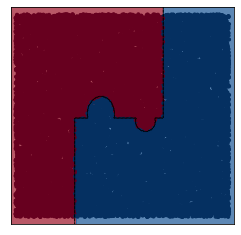

In [57]:
clf = cfiers[1] # modelo original
copy = cfiers_copy[1] # modelo de copia 
h = 0.01
x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(4,4))
ax = plt.subplot(1,1,1)

Z = copy.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap='RdBu', alpha=.7)

ax.scatter(X_copy[:, 0], X_copy[:, 1], s=10, c=y_copy, cmap='RdBu')

Z  = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, cmap=clr.ListedColormap(['black', 'black']), linewidths=0.5, linestyles='dotted')

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xticks([])
ax.set_yticks([])

for label in ax.get_xticklabels() :
    label.set_fontproperties(helvetica8)
for label in ax.get_yticklabels() :
    label.set_fontproperties(helvetica8)

plt.show()

In [58]:
print (copy.get_model_description())

if Attribute 0 <= 0.2533450279469751:
  if Attribute 0 <= -0.2952159146589588:
    Leaf = Class 0 | {0: 3935.212029546377, 1: 340.4980844855792}
  if Attribute 0 > -0.2952159146589588:
    if Attribute 1 <= 0.3901747197882075:
      Leaf = Class 1 | {0: 5.688709546406105, 1: 577.5038784279377}
    if Attribute 1 > 0.3901747197882075:
      Leaf = Class 0 | {0: 435.0986404535948, 1: 24.32702157206166}
if Attribute 0 > 0.2533450279469751:
  if Attribute 0 <= 0.9113011939909773:
    if Attribute 1 <= 0.13326502322407818:
      Leaf = Class 1 | {0: 6.03532320745864, 1: 374.1794553903066}
    if Attribute 1 > 0.13326502322407818:
      Leaf = Class 0 | {0: 388.30242679254184, 1: 24.288344609693116}
  if Attribute 0 > 0.9113011939909773:
    if Attribute 0 <= 1.2299432976241282:
      Leaf = Class 0 | {0: 243.0926985416881, 1: 170.2996503875233}
    if Attribute 0 > 1.2299432976241282:
      Leaf = Class 1 | {0: 30.76640145831082, 1: 1752.3590996124458}



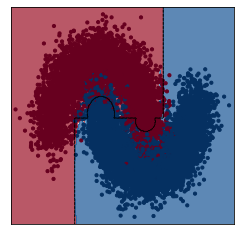

In [59]:
clf = cfiers[1] # modelo original
copy = cfiers_copy[1] # modelo de copia 
h = 0.01
x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(4,4))
ax = plt.subplot(1,1,1)

Z = copy.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap='RdBu', alpha=.7)

ax.scatter(X[:, 0], X[:, 1], s=10, c=y, cmap='RdBu')

Z  = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, cmap=clr.ListedColormap(['black', 'black']), linewidths=0.5, linestyles='dotted')

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xticks([])
ax.set_yticks([])

for label in ax.get_xticklabels() :
    label.set_fontproperties(helvetica8)
for label in ax.get_yticklabels() :
    label.set_fontproperties(helvetica8)

plt.show()